- **Importing keras**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

- **Importing models and layers from keras**
- **Importing mnist dataset**
- **Importing python utilities - numpy**


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

- **Load pre-shuffled MNIST data into train and test sets**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


- **Printing a image from the training dataset**

(60000, 28, 28)


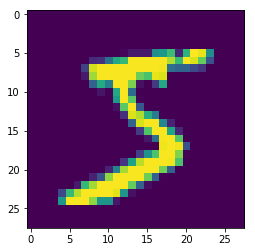

In [81]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

- **Reshaping the images as 28x28 matrix**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

- **Normalizing both the training and test images
such that each value in the image will be b/w 0.0 and 1.0**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

- **Listing the labels (from 0 to 9) for first 10 images**

In [84]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

- **Convert 1-dimensional class arrays to 10-dimensional class matrices**

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

- **This is how the 10 Dimentional class matrix looks like
 The position of "1." at each row is basically the label
 of the image.**

In [86]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Third Network (With all the tools)
              
          
| Observation | Value |
| :------------------- | ---------------: |
| Total Parameters | 13,230  |
| Best Testing Accuracy | 98.21 |
| Best Validation Accuracy | 98.69 |
| Batch Size | 32 |
| Epochs | 20 |
| Optimizer | SGD |
|Overfitting| Reduced|
| 3 Improvements over previous layer | Introduced Batch normalization |
||Introduced droupout|
||Optimizer changed from adam to SGD|






                    

In [87]:
from keras.layers import Activation
model = Sequential()

                                                     # Output channel dimensions | Receptive field
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26 | 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24 | 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 12 | 10x10
model.add(Convolution2D(10, 1, 1, activation='relu')) # 12

model.add(Convolution2D(16, 3, 3, activation='relu')) #  10 | 12x12
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu')) #   8 | 14x14
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu')) #   6 | 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu')) #   4 | 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your

In [88]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_32 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_32 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 16)        0         
__________

- **Using stochastic gradient descent**

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])


- **Training the model with batch size of 32 images and epoch = 20**

In [90]:
model.fit(X_train, Y_train, batch_size=128, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test), )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.9159 - acc: 0.7188 - val_loss: 0.3625 - val_acc: 0.8916
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2779 - acc: 0.9169 - val_loss: 0.2194 - val_acc: 0.9329
Epoch 3/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1933 - acc: 0.9412 - val_loss: 0.1679 - val_acc: 0.9488
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1537 - acc: 0.9535 - val_loss: 0.1307 - val_acc: 0.9599
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1289 - acc: 0.9615 - val_loss: 0.1106 - val_acc: 0.9662
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1131 - acc: 0.9645 - val_loss: 0.1301 - val_acc: 0.9606
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1040 - acc: 0.9681 - val_loss: 0.0835 - val_ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [92]:
print(score)

[0.04619863139530644, 0.9862]


- **Getting the prediction on first 9 images of test set from the trained model**

In [0]:
y_pred = model.predict(X_test)

In [94]:
print(y_pred[:9])
print(y_test[:9])

[[1.38148380e-06 1.61366319e-04 4.42255914e-05 1.73573844e-05
  1.40906494e-07 1.05486944e-08 2.68458866e-12 9.99763548e-01
  2.10585105e-09 1.19877768e-05]
 [8.60441360e-04 3.12108137e-02 9.64529991e-01 1.01194846e-05
  3.25163492e-05 6.65807704e-07 2.11178602e-04 1.46578323e-05
  3.12919542e-03 3.10253910e-07]
 [2.60266177e-07 9.99931455e-01 1.59100418e-05 2.71979320e-06
  1.01391415e-05 3.06538550e-06 2.26160921e-07 2.48781798e-05
  2.97560496e-06 8.47350020e-06]
 [9.99534965e-01 1.22882284e-06 2.24302221e-06 1.60235845e-06
  2.31077956e-05 3.74115589e-05 7.64420256e-05 1.24475526e-04
  8.71717930e-06 1.89945931e-04]
 [8.28659449e-06 1.99581521e-07 6.74156695e-08 3.67185327e-09
  9.99635696e-01 8.95131720e-08 9.12638734e-06 7.99924601e-06
  2.64659752e-06 3.35756078e-04]
 [9.50363528e-07 9.99619961e-01 4.44027683e-05 6.51123219e-06
  5.85445050e-05 3.68079054e-06 3.03142656e-07 1.84341043e-04
  2.58974455e-06 7.87335302e-05]
 [6.10189886e-07 3.90470319e-04 8.75448109e-07 2.70170517e